In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
dados = pd.read_json('Telco-Customer-Churn-limpeza.json')

In [47]:
dados.drop(['ID_Cliente', 'Cobranca_Total', 'Cobranca_Diaria'], axis=1, inplace=True)

In [48]:
for i in dados.select_dtypes(include=['object']).columns:
    if len(dados[i].unique()) > 2:
       print(f"{i}: {dados[i].unique()}")

Multiplas_Linhas: ['No' 'Yes' 'No phone service']
Servico_Internet: ['DSL' 'Fiber optic' 'No']
Servico_Seguranca_Online: ['No' 'Yes' 'No internet service']
Backup_Online: ['Yes' 'No' 'No internet service']
Protecao_Dispositivo: ['No' 'Yes' 'No internet service']
Suporte_Tecnico: ['Yes' 'No' 'No internet service']
TV_Streaming: ['Yes' 'No' 'No internet service']
Filmes_Streaming: ['No' 'Yes' 'No internet service']
Contrato: ['One year' 'Month-to-month' 'Two year']
Metodo_Pagamento: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [49]:
colunas = ['Metodo_Pagamento', 'Contrato', 'Servico_Internet']
dados2 = dados.drop(colunas, axis=1)
dados2.columns

Index(['Churn', 'Genero', 'Idoso', 'Parceiro', 'Dependentes',
       'Meses_na_Empresa', 'Servico_Telefonico', 'Multiplas_Linhas',
       'Servico_Seguranca_Online', 'Backup_Online', 'Protecao_Dispositivo',
       'Suporte_Tecnico', 'TV_Streaming', 'Filmes_Streaming',
       'Faturamento_Eletronico', 'Cobranca_Mensal'],
      dtype='object')

In [50]:
encoding = {'No internet service':0,
              'No phone service': 0,
              'No': 0,
              'Yes': 1,
              'Male':0,
              'Female':1}


In [51]:
dados2 = dados2.replace(encoding)
dados2.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2252\2992035330.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados2 = dados2.replace(encoding)


,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_na_Empresa,Servico_Telefonico,Multiplas_Linhas,Servico_Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,TV_Streaming,Filmes_Streaming,Faturamento_Eletronico,Cobranca_Mensal
0,0,1,0,1,1,9,1,0,0,1,0,1,1,0,1,65.6
1,0,0,0,0,0,9,1,1,0,0,0,0,0,1,0,59.9
2,1,0,0,0,0,4,1,0,0,0,1,0,0,0,1,73.9
3,1,0,1,1,0,13,1,0,0,1,1,0,1,1,1,98.0
4,1,1,1,1,0,3,1,0,0,0,0,1,1,0,1,83.9


In [52]:
# OneHotEncoder
ohe = OneHotEncoder(dtype=int)

colunas_ohe = ohe.fit_transform(dados[colunas]).toarray()
dados3 = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(colunas))], axis=1)
dados3

,Churn,Genero,Idoso,Parceiro,Dependentes,Meses_na_Empresa,Servico_Telefonico,Multiplas_Linhas,Servico_Seguranca_Online,Backup_Online,...,Metodo_Pagamento_Bank transfer (automatic),Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check,Contrato_Month-to-month,Contrato_One year,Contrato_Two year,Servico_Internet_DSL,Servico_Internet_Fiber optic,Servico_Internet_No
0,0,1,0,1,1,9,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1,0,0,0,0,0,9,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
7039,1,0,0,1,0,22,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
7040,0,0,0,0,0,2,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0
7041,0,0,0,1,1,67,1,0,1,0,...,0,0,0,1,0,0,1,1,0,0


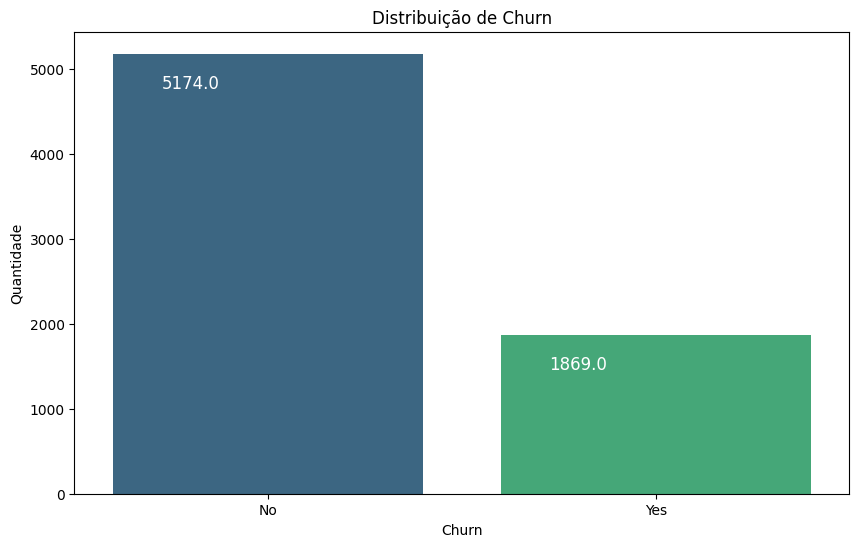

In [53]:
#Distruição de Churn antes do balanceamento

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', hue='Churn', data=dados, palette='viridis', dodge=False)

ax.set_title('Distribuição de Churn')
ax.set_ylabel('Quantidade')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

plt.show()

In [54]:
SEED = 42

In [55]:
# balanceamento usando smote

X = dados3.drop('Churn', axis=1)
y = dados3['Churn']

smote = SMOTE(random_state=SEED)

In [56]:
print(X.isnull().sum())

Genero                                        0
Idoso                                         0
Parceiro                                      0
Dependentes                                   0
Meses_na_Empresa                              0
Servico_Telefonico                            0
Multiplas_Linhas                              0
Servico_Seguranca_Online                      0
Backup_Online                                 0
Protecao_Dispositivo                          0
Suporte_Tecnico                               0
TV_Streaming                                  0
Filmes_Streaming                              0
Faturamento_Eletronico                        0
Cobranca_Mensal                               0
Metodo_Pagamento_Bank transfer (automatic)    0
Metodo_Pagamento_Credit card (automatic)      0
Metodo_Pagamento_Electronic check             0
Metodo_Pagamento_Mailed check                 0
Contrato_Month-to-month                       0
Contrato_One year                       

In [57]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [58]:
dados4 = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)

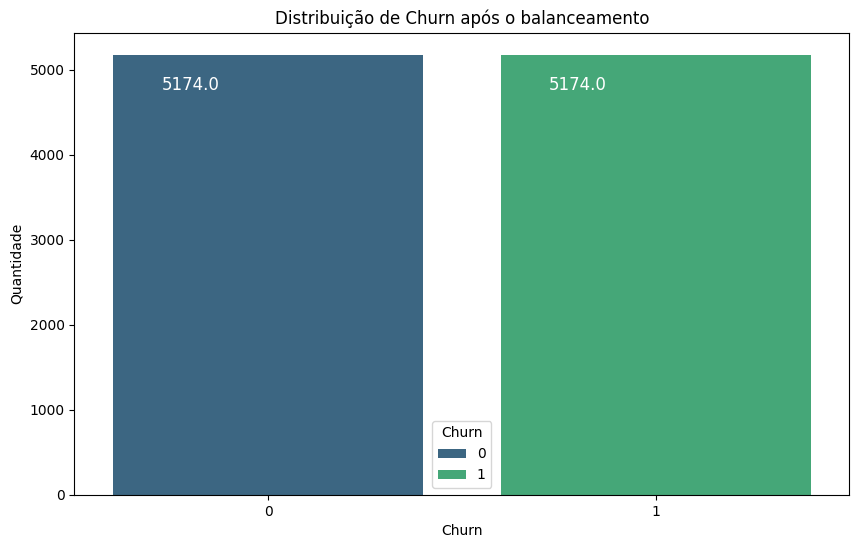

In [59]:
# Distribuição de Churn após o balanceamento

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Churn', hue='Churn', data=dados4, palette='viridis', dodge=False)

ax.set_title('Distribuição de Churn após o balanceamento')
ax.set_ylabel('Quantidade')

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

plt.show()


In [60]:
dados4.to_json("Telco-Customer-Churn-balanceamento.json")

#### SVG

In [61]:
# Separando dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=SEED)

In [62]:
# SVG (Support Vector Machine) - Basicamente é um classificador que encontra o hiperplano que melhor separa duas classes no espaço de atributos

svc = SVC(random_state=SEED) # Criação do modelo
svc.fit(X_train, y_train) # Treinamento do modelo
y_pred_svg = svc.predict(X_test) # Predição do modelo

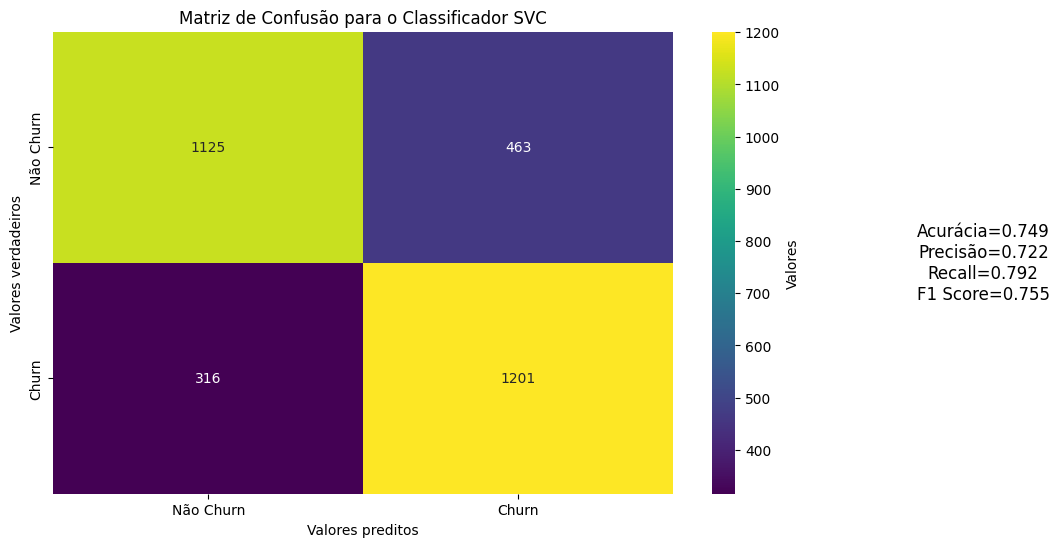

In [63]:
cm = confusion_matrix(y_test, y_pred_svg)
accuracy = accuracy_score(y_test, y_pred_svg)
precision = precision_score(y_test, y_pred_svg)
recall = recall_score(y_test, y_pred_svg)
f1 = f1_score(y_test, y_pred_svg)

variaveis = ['Churn', 'Não Churn']
labels = ['Verdadeiro Positivo', 'Falso Negativo', 'Falso Positivo', 'Verdadeiro Negativo']

#Plotando a matriz de confusão

plt.figure(figsize=(10, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Valores'})

# Configurando os rótulos dos eixos
ax.set_xticklabels(['Não Churn', 'Churn'])
ax.set_yticklabels(['Não Churn', 'Churn'])
plt.xlabel('Valores preditos')
plt.ylabel('Valores verdadeiros')

plt.title('Matriz de Confusão para o Classificador SVC')

plt.text(1.5, 0.5, f'Acurácia={accuracy:.3f}\nPrecisão={precision:.3f}\nRecall={recall:.3f}\nF1 Score={f1:.3f}',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

plt.show()


#### Decision Tree

In [64]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=SEED)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

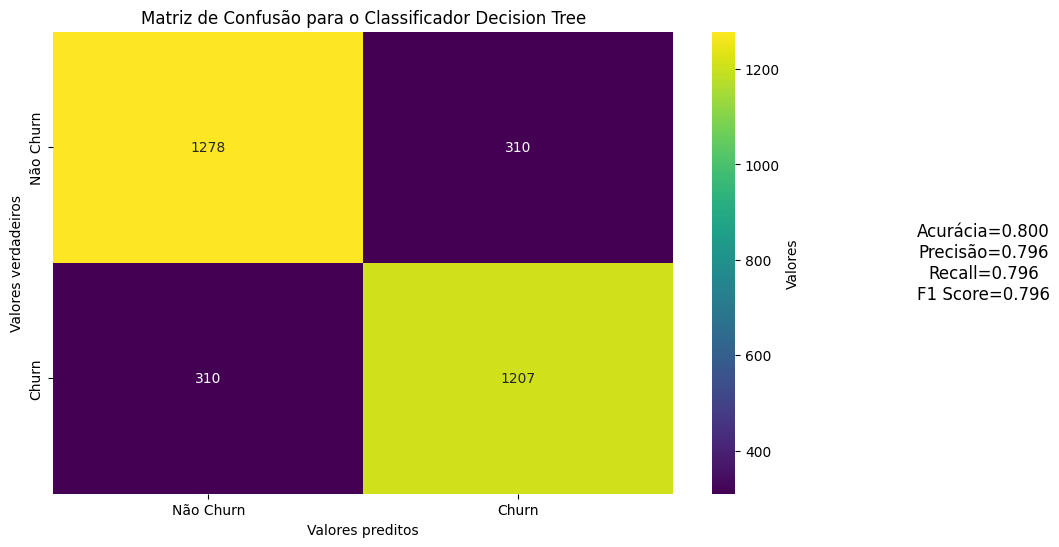

In [65]:
cm = confusion_matrix(y_test, y_pred_dt)
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

variaveis = ['Churn', 'Não Churn']
labels = ['Verdadeiro Positivo', 'Falso Negativo', 'Falso Positivo', 'Verdadeiro Negativo']

#Plotando a matriz de confusão

plt.figure(figsize=(10, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Valores'})

# Configurando os rótulos dos eixos
ax.set_xticklabels(['Não Churn', 'Churn'])
ax.set_yticklabels(['Não Churn', 'Churn'])
plt.xlabel('Valores preditos')
plt.ylabel('Valores verdadeiros')

plt.title('Matriz de Confusão para o Classificador Decision Tree')

plt.text(1.5, 0.5, f'Acurácia={accuracy:.3f}\nPrecisão={precision:.3f}\nRecall={recall:.3f}\nF1 Score={f1:.3f}',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

plt.show()


#### Randon Forest

In [66]:
rforest = RandomForestClassifier(max_depth=5, random_state=SEED)
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)

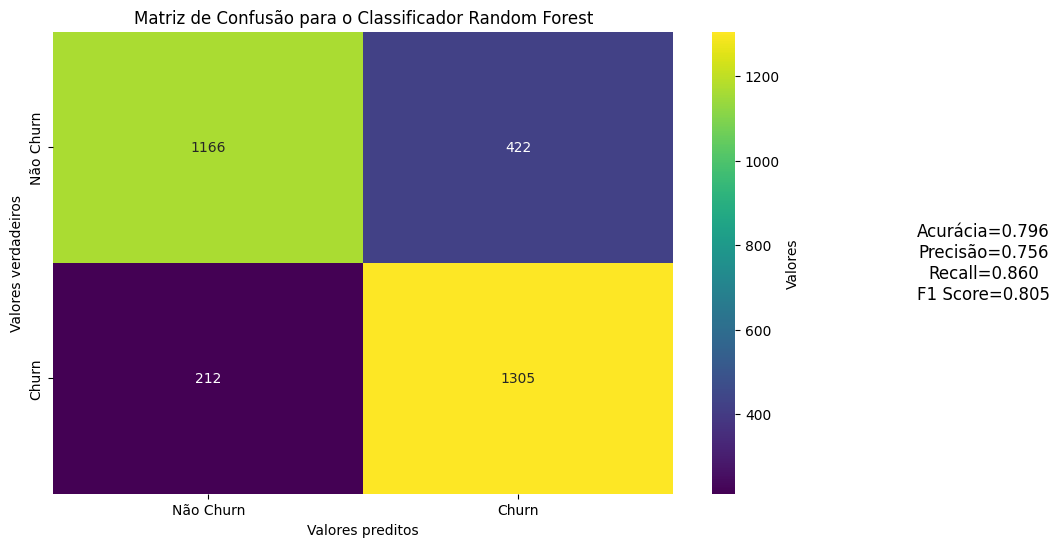

In [67]:
cm = confusion_matrix(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

variaveis = ['Churn', 'Não Churn']
labels = ['Verdadeiro Positivo', 'Falso Negativo', 'Falso Positivo', 'Verdadeiro Negativo']

#Plotando a matriz de confusão

plt.figure(figsize=(10, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Valores'})

# Configurando os rótulos dos eixos
ax.set_xticklabels(['Não Churn', 'Churn'])
ax.set_yticklabels(['Não Churn', 'Churn'])
plt.xlabel('Valores preditos')
plt.ylabel('Valores verdadeiros')

plt.title('Matriz de Confusão para o Classificador Random Forest')

plt.text(1.5, 0.5, f'Acurácia={accuracy:.3f}\nPrecisão={precision:.3f}\nRecall={recall:.3f}\nF1 Score={f1:.3f}',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12)

plt.show()


In [73]:
# Comparando os modelos 

modelos = ['SVC', 'Decision Tree', 'Random Forest']
acuracia_train = [svc.score(X_train, y_train), dtree.score(X_train, y_train), rforest.score(X_train, y_train)]
acuracia_test = [accuracy_score(y_test, y_pred_svg), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]
precisao = [precision_score(y_test, y_pred_svg), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_rf)]
recall = [recall_score(y_test, y_pred_svg), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_rf)]
f1 = [f1_score(y_test, y_pred_svg), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_rf)]

df = pd.DataFrame({'Modelo': modelos,'Acurácia Treino': acuracia_train, 'Acurácia Teste': acuracia_test, 'Precisão': precisao, 'Recall': recall, 'F1 Score': f1})
df


,Modelo,Acurácia Treino,Acurácia Teste,Precisão,Recall,F1 Score
0,SVC,0.751346,0.749114,0.721755,0.791694,0.755108
1,Decision Tree,0.809471,0.800322,0.795649,0.795649,0.795649
2,Random Forest,0.818722,0.795813,0.755646,0.860250,0.804562
